PROJECT TITLE:COLLEGE MANAGEMENT SYSTEM

PURPOSE:The purpose of a college management system is to streamline and automate various administrative tasks within a college or university. It helps in managing student data, academic records, course schedules, faculty information, financial transactions, and more. The system aims to enhance efficiency, reduce manual work, improve communication between different departments, and provide accurate and up-to-date information for better decision-making. It also assists in monitoring student progress, tracking attendance, generating reports, and facilitating communication between students, faculty, and administrators. Overall, a college management system plays a crucial role in ensuring smooth operations and effective management of educational institutions.

Step 0 : Downloading necessary packages

In [54]:
!pip install mysql-connector-python
!pip install pandas
!pip install matplotlib

Step 1 : Importing necessary packages

In [56]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

# Step 2 : Establishing Connection (Database connectivity from python to mysql database)

In [57]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect (
    user = 'root', password = 'komal07', host = 'localhost',
    database = 'collegemanagementsystem'
)

### Step 3 : Data View

In [58]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'student08' table
cursor.execute('SELECT * FROM student08')
#After fetching data from the database we are storing it into Pandas DataFrame
student08_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(student08_data.head())

   StudentID FirstName LastName DateOfBirth Gender                      Email  \
0          1      John      Doe  2000-01-01      M       john.doe@example.com   
1          2      Jane    Smith  2000-02-02      F     jane.smith@example.com   
2          3     Alice  Johnson  2000-03-03      F  alice.johnson@example.com   
3          4       Bob    Brown  2000-04-04      M      bob.brown@example.com   
4          5   Charlie    Davis  2000-05-05      M  charlie.davis@example.com   

        Phone       Address  
0  1234567890   123 Main St  
1  2345678901    456 Elm St  
2  3456789012    789 Oak St  
3  4567890123  101 Maple St  
4  5678901234   202 Pine St  


In [59]:
# Query data from the 'course08' table
cursor.execute('SELECT * FROM course08')
# Fetch the data from the cursor and store it into a Pandas DataFrame
course08_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(course08_data.head())

   CourseID                 CourseName Department  Credits
0       101                Art History  Fine Arts        3
1       102             Microeconomics  Economics        3
2       103  Introduction to Sociology  Sociology        3
3       104              World History    History        3
4       105      Environmental Science    Science        4


In [60]:
# Query data from the'professor07' table
cursor.execute('SELECT * FROM professor07')
# Fetch the data from the cursor and store it into a Pandas DataFrame
professor07_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(professor07_data.head())

   ProfessorID        ProfessorName        Department             position
0            1    Dr. Sarah Johnson           Biology  Associate Professor
1            2      Dr. Michael Lee  Computer Science            Professor
2            3       Dr. Emily Chen        Psychology  Assistant Professor
3            4  Dr. David Rodriguez         Chemistry  Associate Professor
4            5     Dr. Jessica Wong       Mathematics            Professor


In [61]:
# Query data from the 'enrollment00' table
cursor.execute('SELECT * FROM enrollment00')
# Fetch the data from the cursor and store it into a Pandas DataFrame
enrollment00_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(enrollment00_data.head())

   EnrollmentID  StudentID  CourseID EnrollmentDate Grade
0           501          1       101     2024-06-05     A
1           502          2       102     2024-06-05    B+
2           503          3       103     2024-06-05    A-
3           504          4       104     2024-06-05     B
4           505          5       105     2024-06-05    C+


In [62]:
# Query data from the 'Departments' table
cursor.execute('SELECT * FROM Departments')
# Fetch the data from the cursor and store it into a Pandas DataFrame
Departments_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(Departments_data.head())

   DepartmentID     DepartmentName  HeadProfessorID         Phone
0             1          Economics                1  111-222-3333
1             2         Psychology                2  444-555-6666
2             3          Sociology                3  777-888-9999
3             4  Political Science                4  123-456-7890
4             5        Art History                5  987-654-3210


Step 4 : Data Cleaning

In [63]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("\nstudent08\n----------")
print(student08_data.isnull().sum())
print("\ncourse08\n----------")
print(course08_data.isnull().sum())
print("\nprofessor07\n----------")
print(professor07_data.isnull().sum())
print("\nenrollment00\n----------")
print(enrollment00_data.isnull().sum())
print("\nDepartments\n----------")
print(Departments_data.isnull().sum())


student08
----------
StudentID      0
FirstName      0
LastName       0
DateOfBirth    0
Gender         0
Email          0
Phone          0
Address        0
dtype: int64

course08
----------
CourseID      0
CourseName    0
Department    0
Credits       0
dtype: int64

professor07
----------
ProfessorID      0
ProfessorName    0
Department       0
position         0
dtype: int64

enrollment00
----------
EnrollmentID      0
StudentID         0
CourseID          0
EnrollmentDate    0
Grade             0
dtype: int64

Departments
----------
DepartmentID       0
DepartmentName     0
HeadProfessorID    0
Phone              0
dtype: int64


In [64]:
# Drop rows with any missing values (NaN) from the dataframe
student08_data.dropna(inplace=True)
course08_data.dropna(inplace=True)
professor07_data.dropna(inplace=True)
enrollment00_data.dropna(inplace=True)
Departments_data.dropna(inplace=True)

In [65]:
# Print the number of duplicate rows in the DataFrame
print(student08_data.duplicated().sum())
print(course08_data.duplicated().sum())
print(professor07_data.duplicated().sum())
print(enrollment00_data.duplicated().sum())
print(Departments_data.duplicated().sum())

0
0
0
0
0


In [66]:
# Count the number of events
count_of_transactions = student08_data['StudentID'].value_counts()

# Print the number of transactions for each user
print(count_of_transactions)

StudentID
1      1
64     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 100, dtype: int64


In [67]:
#arrabge the Credits in ascending order
course08_data.sort_values(by='Credits', ascending=True)

,CourseID,CourseName,Department,Credits
0,101,Art History,Fine Arts,3
67,168,Introduction to Fashion Design,Fashion Design,3
65,166,Introduction to Political Philosophy,Philosophy,3
64,165,Introduction to Literature,English,3
62,163,Introduction to Film Studies,Film Studies,3
...,...,...,...,...
59,160,Introduction to Human Anatomy,Biology,4
21,122,Computer Science I,Computer Science,4
66,167,Introduction to Computer Graphics,Computer Science,4
25,126,Chemistry I,Chemistry,4


In [68]:
#arrange the enrollmentdate date in ascending order
enrollment00_data.sort_values(by='EnrollmentDate', ascending=True)

,EnrollmentID,StudentID,CourseID,EnrollmentDate,Grade
0,501,1,101,2024-06-05,A
68,574,74,174,2024-06-05,B
67,573,73,173,2024-06-05,A-
66,572,72,172,2024-06-05,B+
65,571,71,171,2024-06-05,A
...,...,...,...,...,...
27,533,33,133,2024-06-05,B
26,532,32,132,2024-06-05,A-
25,531,31,131,2024-06-05,B+
34,540,40,140,2024-06-05,A-


Data Visualization

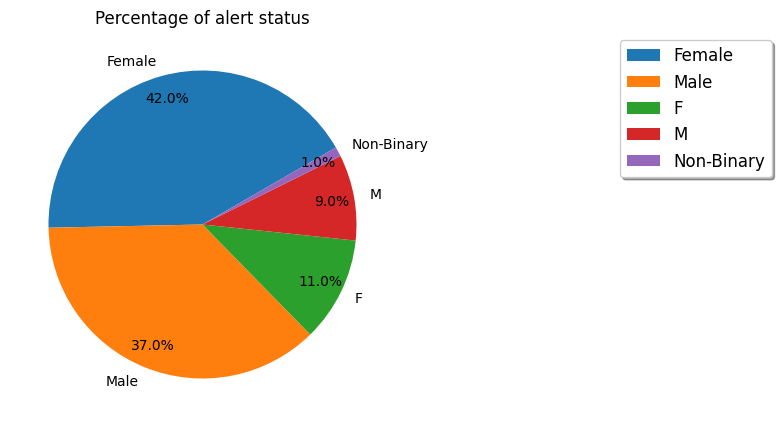

In [69]:
# Pie chart for percentage of student08 by alert status
Gender = student08_data['Gender'].value_counts()  # Count the occurrences of each location
plt.figure(figsize=(10,5))  # Set the figure size to 6x6 inches
patches, texts, autotexts = plt.pie(Gender.values, labels=Gender.index, startangle=30,autopct='%1.1f%%', pctdistance=0.85) 
plt.title('Percentage of alert status')  # Set the title of the chart
plt.legend(loc='upper right', fontsize=12, shadow=True,bbox_to_anchor=(2,1))
# Display the chart
plt.show() 

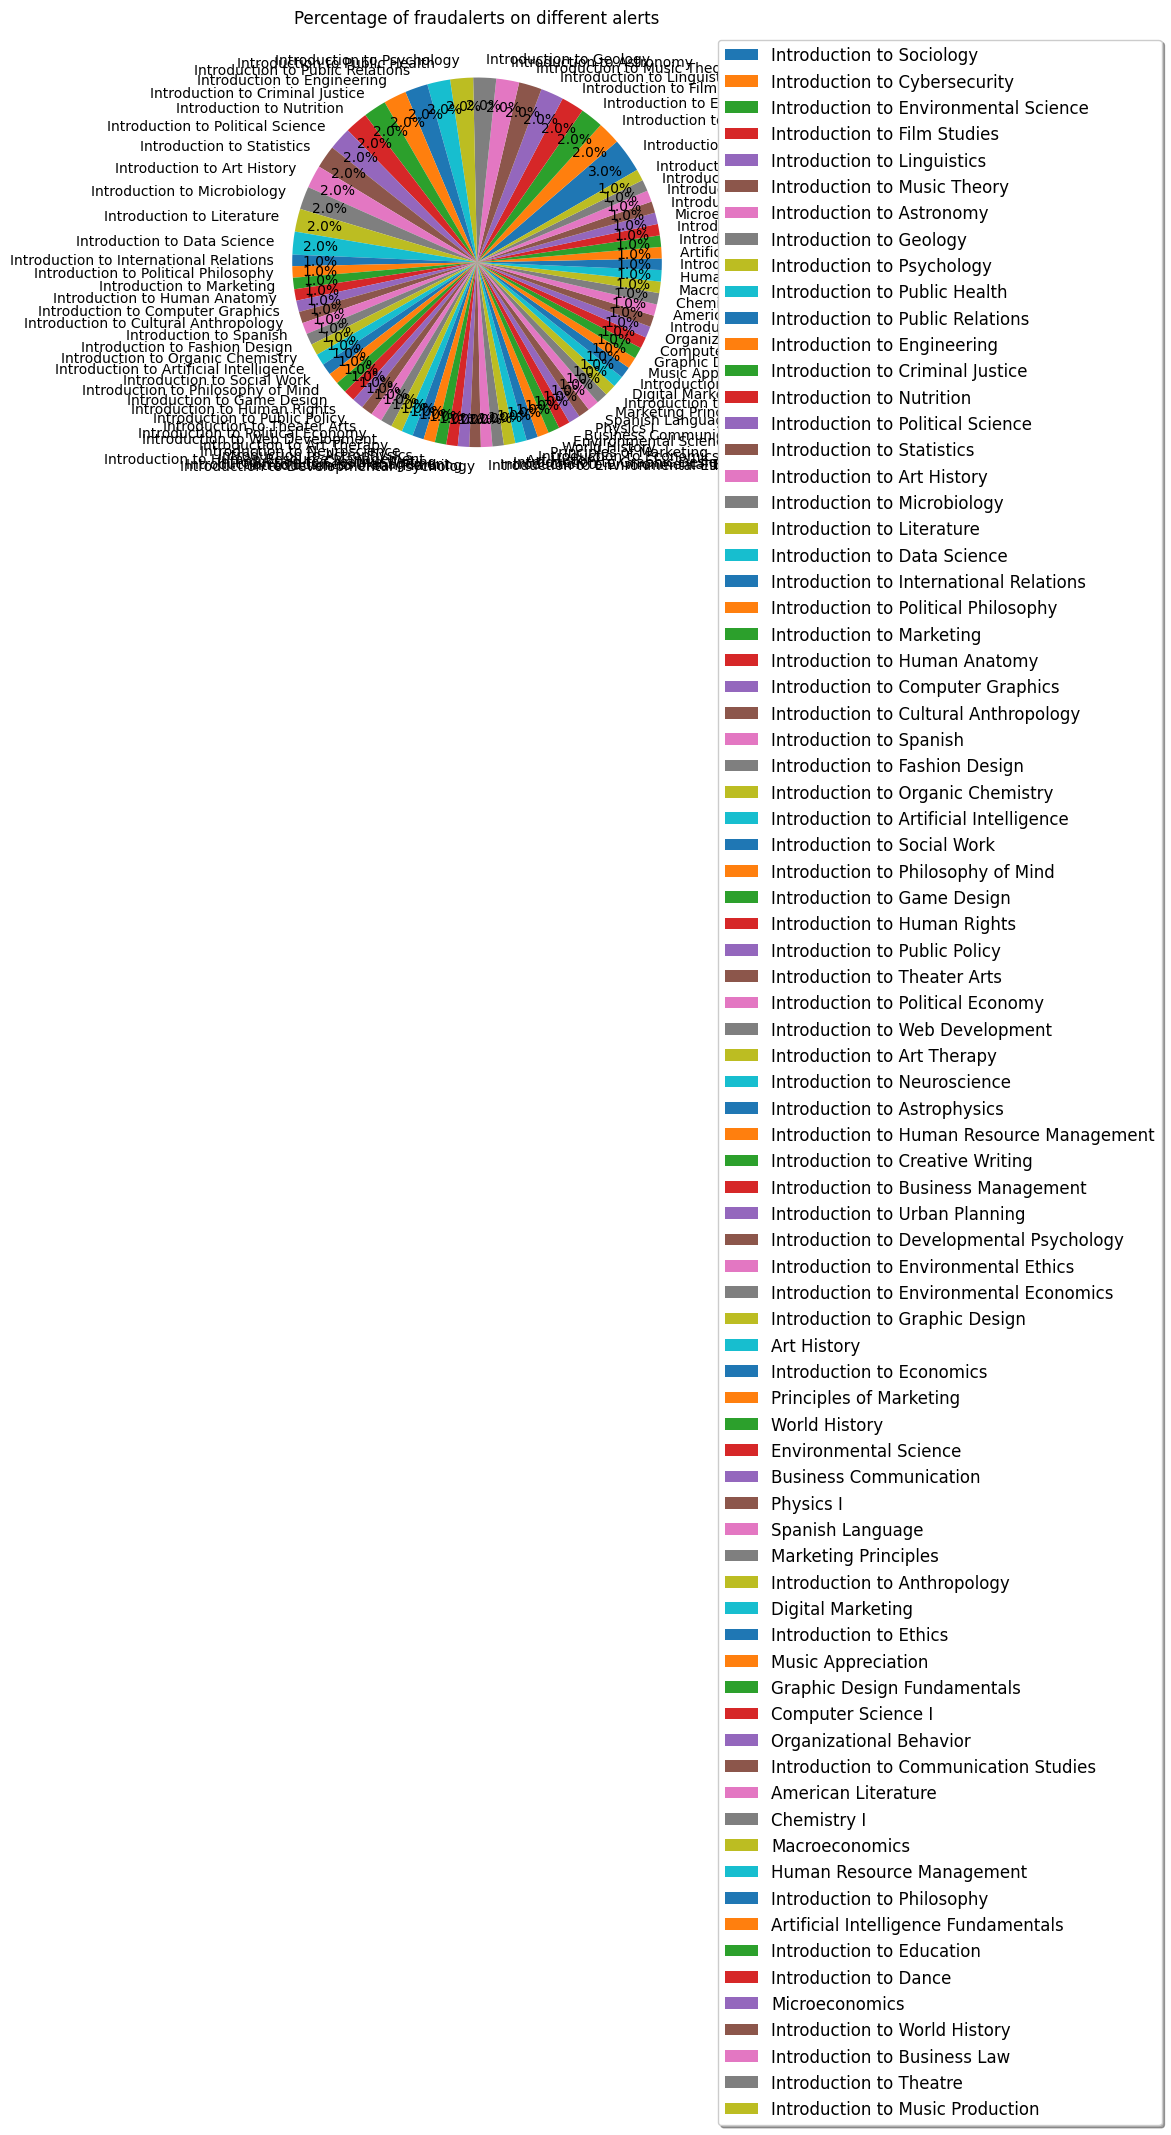

In [70]:
# Pie chart for percentage of fraud alerts on different alert types
CourseName= course08_data['CourseName'].value_counts()  # Count the occurrences of each location
plt.figure(figsize=(10,6))  # Set the figure size to 6x6 inches
patches, texts, autotexts = plt.pie(CourseName.values, labels=CourseName.index, startangle=30,autopct='%1.1f%%', pctdistance=0.85) 
plt.title('Percentage of fraudalerts on different alerts')  # Set the title of the chart
plt.legend(loc='upper right', fontsize=12, shadow=True,bbox_to_anchor=(2,1))
# Display the chart
plt.show() 

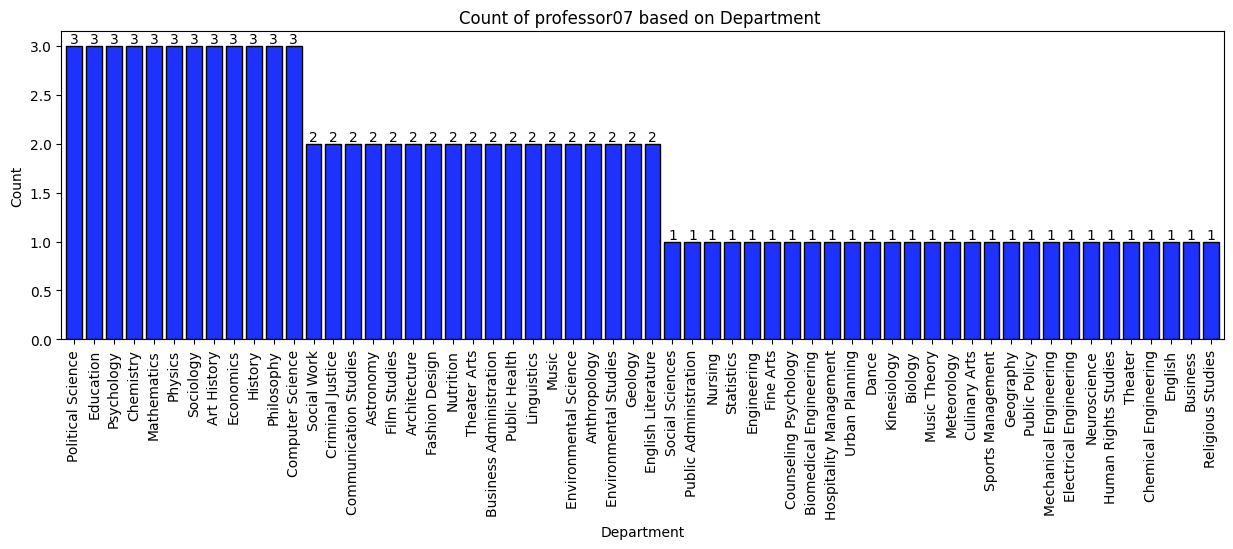

In [71]:
# Create a new figure with a specific size (width=10, height=4)
plt.figure(figsize=(15, 4))

# Create a bar plot showing the count of fraudalerts based on alert types
ax = professor07_data['Department'].value_counts().plot(kind='bar',color='#1D32FF',fontsize=10,edgecolor='black',width=0.8)

# Set the x-axis label
plt.xlabel('Department')
# Set the y-axis label
plt.ylabel('Count')
# Set the title of the plot
plt.title('Count of professor07 based on Department ')

# Add text labels to each bar indicating its count
for i, count in enumerate(professor07_data['Department'].value_counts()):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

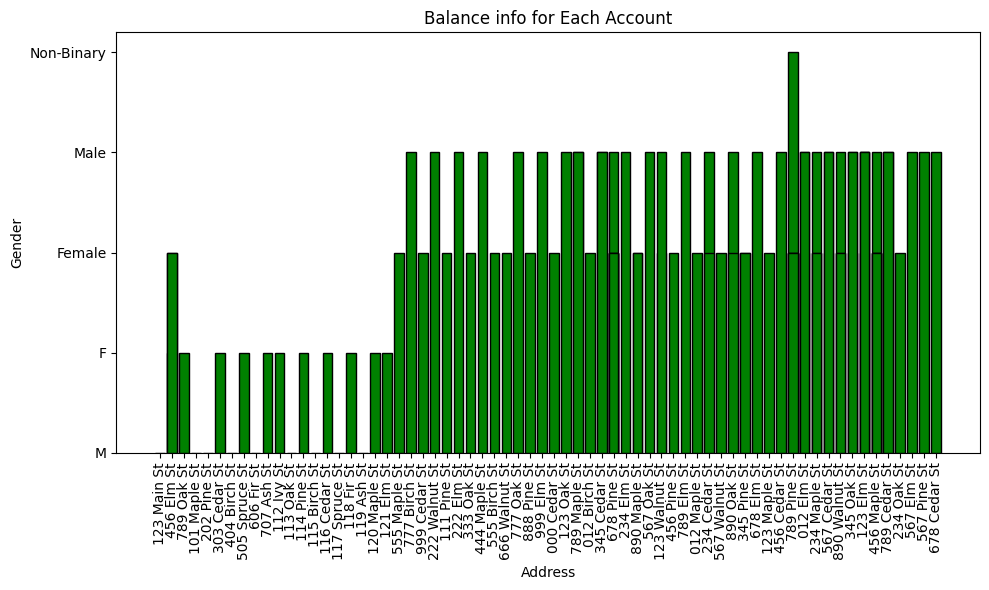

In [72]:
# create an line chart for accounts data based on balance
plt.figure(figsize=(10, 6))
plt.bar(student08_data['Address'], student08_data['Gender'], color='green',edgecolor='black',width=0.8)
plt.xlabel('Address')
plt.ylabel('Gender')
plt.title('Balance info for Each Account')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

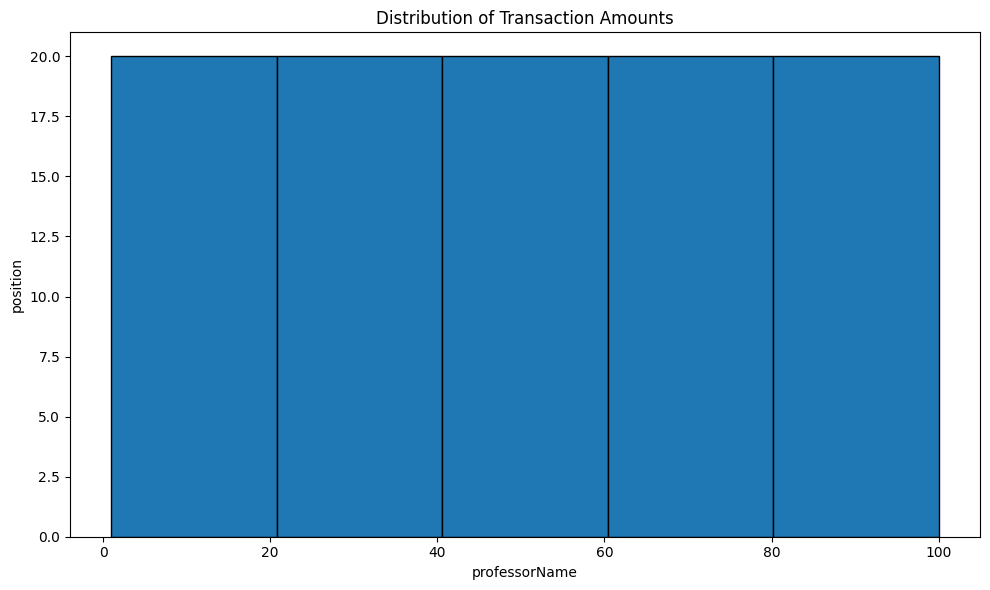

In [77]:
# Create a histogram for the transaction amount column
plt.figure(figsize=(10, 6))
plt.hist(professor07_data['ProfessorID'], bins=5, edgecolor='black')
plt.xlabel('professorName')
plt.ylabel('position')
plt.title('Distribution of Transaction Amounts')
plt.tight_layout()

# Show the plot
plt.show()

# conclusion

The system centralizes all college-related data in a single database, ensuring easy access, management, and retrieval of information.
It reduces data redundancy and ensures data integrity through the use of relational database principles.
Automation of administrative tasks such as registration, attendance tracking, and grade reporting reduces the workload on staff and faculty.
Streamlined processes lead to faster and more accurate handling of information.
The system is designed to accommodate the growth of the institution, with the ability to scale and incorporate additional features as needed.
Customizable modules allow for adaptation to specific institutional requirements.
Implementation of robust security measures ensures that sensitive data is protected against unauthorized access and breaches.
Role-based access control ensures that users can only access information relevant to their roles.